In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist

(images_train, targets_train), (images_test, targets_test) = tf.keras.datasets.fashion_mnist.load_data()

print(images_train.shape)
print(targets_train.shape)

images_train = images_train.astype(float)
images_test = images_test.astype(float)

images_train = images_train/255
images_test = images_test/255

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [5]:
history = model.fit(images_train,
                    targets_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 3ms/step - loss: 0.4988 - accuracy: 0.8202 - val_loss: 0.4015 - val_accuracy: 0.8512
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3686 - accuracy: 0.8640 - val_loss: 0.3633 - val_accuracy: 0.8658
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3299 - accuracy: 0.8781 - val_loss: 0.3402 - val_accuracy: 0.8770
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3066 - accuracy: 0.8857 - val_loss: 0.3398 - val_accuracy: 0.8755
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2899 - accuracy: 0.8913 - val_loss: 0.3275 - val_accuracy: 0.8822
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2703 - accuracy: 0.8986 - val_loss: 0.3507 - val_accuracy: 0.8763
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9021 - val_loss: 0.3350 - val_accuracy:

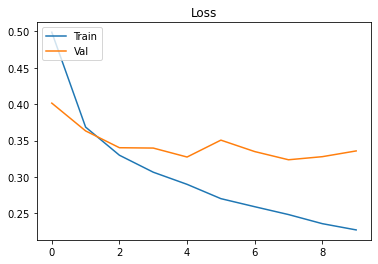

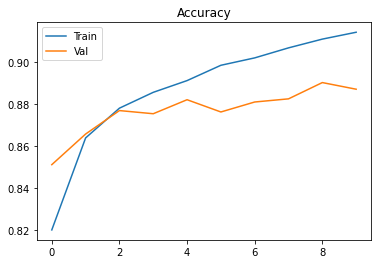

In [6]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [7]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8798
Test Loss 0.36400559544563293
Test Accuracy 0.879800021648407
